<a href="https://colab.research.google.com/github/Jorgvt/Master_IA3/blob/master/Ejercicio_batmobile_hecho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

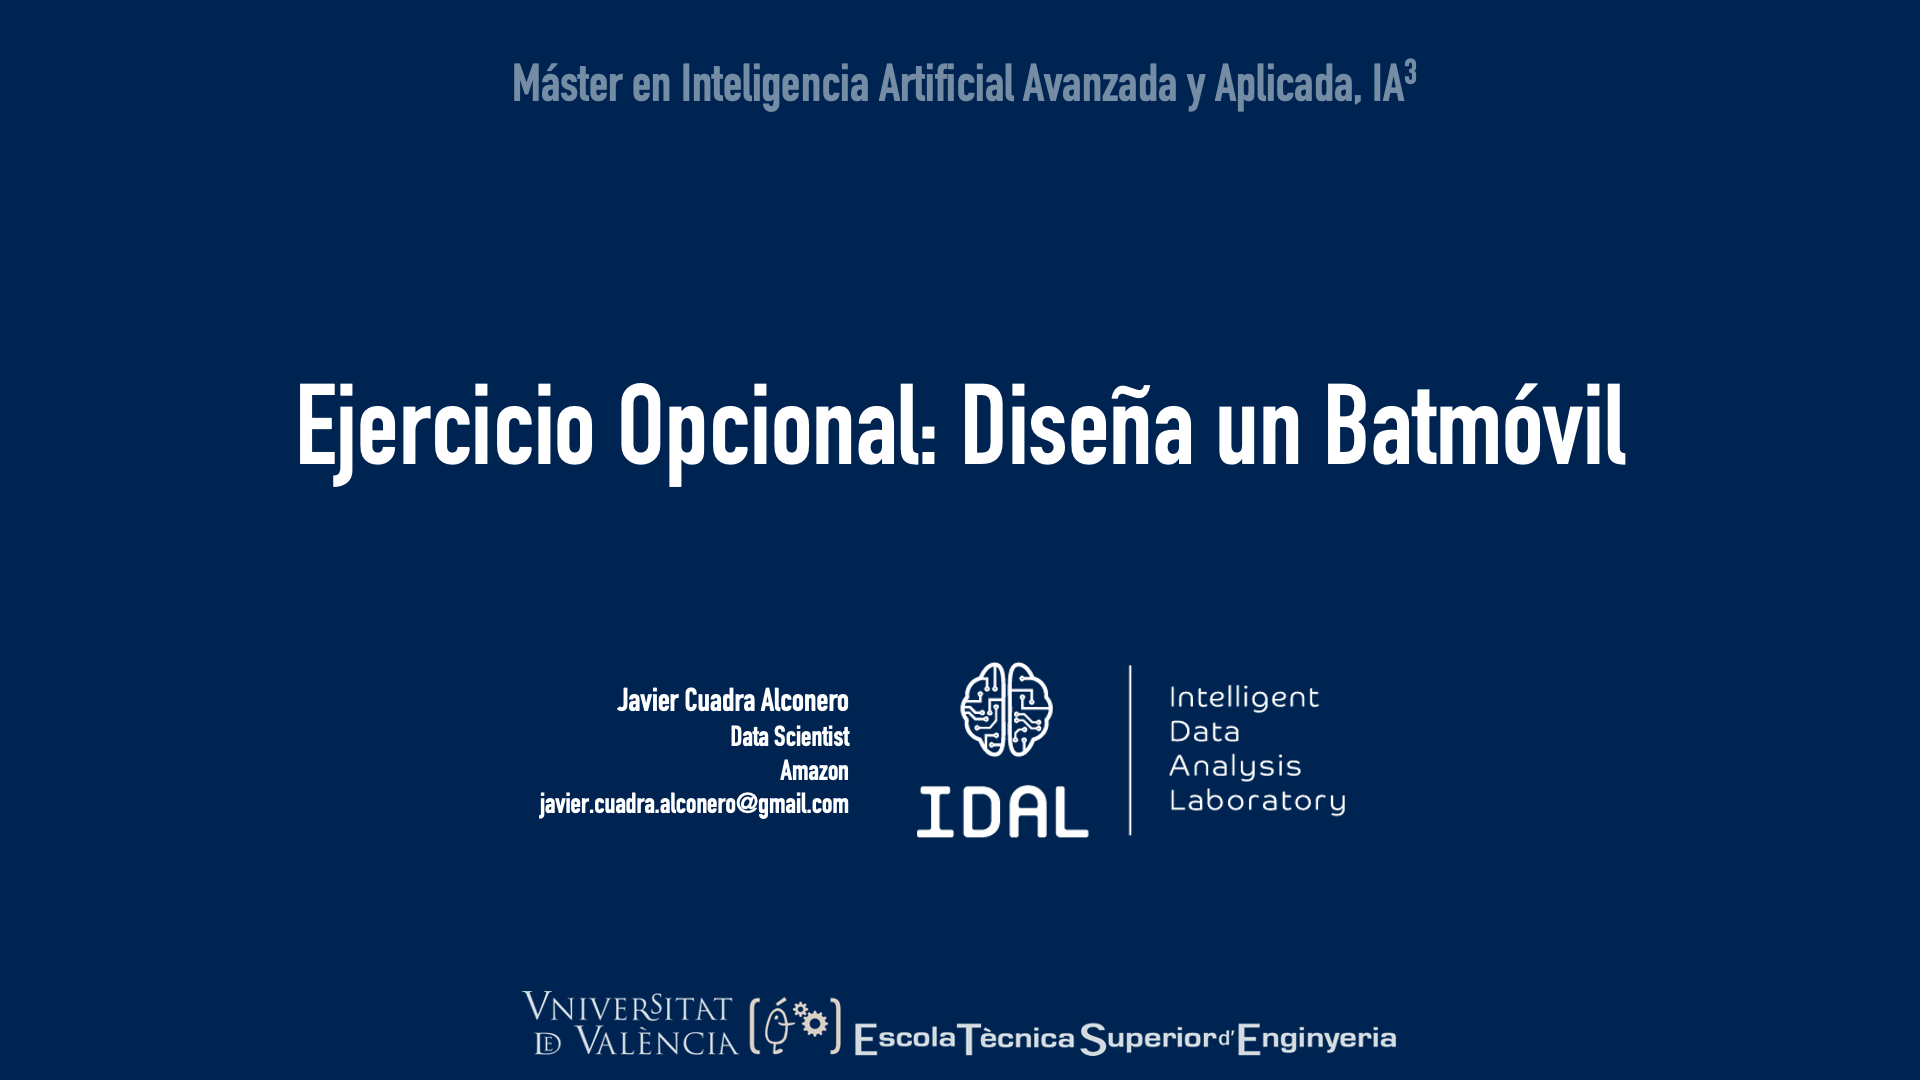

# Consideraciones:

- Se trata de un ejercicio opcional a realizar en grupos de tres
- El entregable de este ejercicio debe ser un link a vuestro cuaderno de colaboratory alojado en Github
- La evaluación del ejercicio será una ejecución del cuaderno
- Todos los métodos descritos deben imprimir un resultado en pantalla
- Aquellos que completen el sistema discreto recibirán un punto extra en este módulo
- **Se dispone de un total de dos semanas para terminar el ejercicio (aunque lo empezamos ahora)**

Este ejercicio se propone dada la importancia de la programación orientada a objetos en el lenguaje Python. Gran parte de las librerías utilizadas en ML y DL requieren de un conocimiento básico de este paradigma para poder sacarles provecho y modelar de forma apropiada. Debido a este se propone este ejercicio para motivar a los alumnos a familiarizarse con esta tecnología.

# Exercise 1
Hi Guys Cristopher Nolan is here. Don't talk about this, but I am making a new Batman movie and I need your help to design the new Batmobile. For this ocassion I would like you to design it as several Python Classes.

- Design the main Batmobile class with the following attributes: Pilot (It could be Batman or Robin), number of batrockets loaded, number of pem (this are electromagnetic pulses to counter the Joker weapons) uses left, liters of gas left in the batmobile

- Add the following methods to the Batmobile class: A method to accelerate the batmobile and drive for some distance, a method to activate the turbo and drive for some distance faster than the normal method, a method to launch a rocket to a Joker colleague, a method to launch a pem use.

- Create the following classes to interact with the Batmobile: Joker, Joker Villain, Rocket, PEM Pulse.

- The Joker and Jokker Villain class should have a parameter called KO which will turn to True when they receive a Rocket. They also have a parameter called Weapon which should turn to false if they receive a PEM Pulse. 

- The Rocket and PEM Pulse are the ammunition of the Batmobile, the car can only use the weapons if it has ammunition in the arsenal.

- Finally draw a diagram of the classes using diagram.io showing how they interact.

Se propone la siguiente distribución de la carga de trabajo:
- Un estudiante podría diseñar la clase del batmóvil. Mientras sus dos compañeros podrían desarrollar las clases relacionadas con el armamento del mismo y los distintos villanos descritos.
- Una vez desarrolladas las piezas de código por separado se procedería a la integración en equipo de todo el sistema.
- Uno de los estudiantes (aquel con menor carga en programación) desarrollaría el diagrama de la pieza de software.

# Solution

The first thing we realized is that both Rocket and PEM classes share a common trait: they represent the Ammo of the Batmobile. Knowing that, we naturally thought about defining a general class Ammo and creating Rocket and PEM as child classes of the former. This allowed us to define general ammo methods such as ```.ammo_left()``` and ```.use()``` that all of the weapons could use, and by doing so the code became a lot less redundant and encapsulated.

A thing to note is that each of the child classes has an atributte that isn't present in Ammo: ```kind```. This atributte differentiates the kinds of ammo and is used for formatting purpouses and conceptualization.

In [1]:
import numpy as np

In [2]:
"""
    ammo int
"""

class Ammo:
    def __init__(self, ammo):
        if isinstance(ammo, int):
            self.ammo = ammo
        else:
            raise Exception("The ammo must be an int.")

    def ammo_left(self):
        if self.ammo > 1:
            print(f"There are {self.ammo} {self.kind}s left.")
        else:
            print(f"There are {self.ammo} {self.kind} left.")
    

    def use(self):
        if self.ammo > 0:
          self.ammo = self.ammo - 1
          print(f"{self.kind} used!")
          self.ammo_left()
          return True
        else:
          print("No queda munición")
          return False

class Rocket(Ammo):
    def __init__(self, ammo):
        super().__init__(ammo)
        self.kind = "Rocket"

class PEM(Ammo):
    def __init__(self, ammo):
        super().__init__(ammo)
        self.kind = "PEM"

The exact same approach was taken to code the Joker and Joker_Villain classes as they share every functionality besides the name. The parent Villain class implements the methods ```.rocket_hit()``` and ```.pem_hit()``` to change the Villain's status depending if they've been hit by a rocket or a PEM. As both methods have to be usable by Joker and Joker_Villains, they are defined in the parent class.

As a gimmick we added the possibility of setting the name of the Joker_Villains but, if no name is given, it takes one randomly from a predefined list of Batman Enemies.

In [3]:
"""
    name string
"""

class Villain:
    def __init__(self):
        self.ko = False
        self.weapon = True

    def rocket_hit(self):
        self.ko = True

    def pem_hit(self):
        self.weapon = False

class Joker(Villain):
    def __init__(self):
        super().__init__()
        self.name = 'Joker'

class Joker_Villain(Villain):
    def __init__(self, name=""):
        super().__init__()
        if (name == "") or (not isinstance(name, str)):
          self.name = self.get_random_name()
        else:
          self.name = name

    def get_random_name(self):
        names = ["Harley Quinn", "Scarecrow", "Bane"]
        return np.random.choice(names)

Finally, we define the Batmobile class. It receives the ```Rocket``` and ```PEM``` we defined before and the ammount of gas wanted and implements 2 methods to move (accelerate and turbo) and 2 methods to use the weapons (```launchRocket``` and ```launchPem```). The last 2 methods allow the user to attack a specific villain or a list of villains. If the last is chosen, the attack is chosen randomly among the villains in the list.

*Disclaimer:* In our approach, the ammo of rockets and PEMs isn't stored directly in the Batmobile class, but on the Rocket and PEM ```.ammo``` atributte, which can be accessed from the ```Batmobile``` class as follows: ```Batmobile.batrockets.ammo``` or ```Batmobile.pem.ammo```.

In [4]:
"""
  pilot string
  batrockets class Rocket
  pem class Pem
  gas int or float
"""

class Batmobile:
    def __init__(self, pilot, batrockets, pem, gas):
        if isinstance(pilot, str):
            if pilot == "Robin" or pilot == "Batman":
                self.pilot = pilot
            else:
                raise Exception("The Batmobile can only be driven by Batman or Robin.")
        else:
            raise Exception("The Batmobile driver must be passed as a string.")
    
        if (isinstance(batrockets, Rocket)):
            self.batrockets = batrockets

        else:
            raise Exception("Rockets must be of class Rocket.")
    
        if (isinstance(pem, PEM)):
            self.pem = pem

        else:
            raise Exception("PEM must be of class PEM.")
        
        self.gas = 0
        self._add_gas(gas)
  
    def accelerate(self):
        if self.gas > 1:
            self.gas -= 1
            print("Accelerating!")
            print(f"{self.gas}L of de gas remaining.")
        else:
            print("There's no more gas, park and use the BatBike or add more gas!")

    def _add_gas(self, gas): #Hidden method used to setup the initial gas ammount. Shows no print.
        if (isinstance(gas, int) or isinstance(gas, float)):
            self.gas += gas
        else:
            raise Exception("The Batmobile can only accept int or float gas ammounts.")    

    def add_gas(self, gas): #General method for adding was. Shows a printed report.
        try:
            self._add_gas(gas)
        except:
            raise Exception("The Batmobile can only accept int or float gas ammounts.")   
        else: 
            print(f"{gas}L have been added to the tank.\nNow there are {self.gas}L available.")

    def turbo(self):
        if self.gas > 10:
            self.gas -= 10
            print("Using boost!")
            print(f"{self.gas}L of gas remaining.")

        else:
            print("There's not enough gas to boost! Slow down!")  

    def launchRocket(self, villains):
        cond = True

        if isinstance(villains, list):  
            for villain in villains:
                if not isinstance(villain, Villain):
                    cond = False
        
            if cond:
                prob = np.random.randint(1, 11)
                use = self.batrockets.use()

            if len(villains) > 0:
                villain = np.random.choice(villains, 1)[0]

            else:
                print("There are no villains to kill")
                return

            
            if prob < 5 and use and len(villains) > 0:
                print(f"{villain.name} was hit!")
                villain.rocket_hit()
                villains = villains.remove(villain)

            elif prob >= 5 and use:
                print("Missed!")

            else:
                raise Exception("The input must be a list of Villains. Consider using [Villain] if only using 1 Villain.")
        else:
            raise Exception("The input must be a list of Villains. Consider using [Villain] if only using 1 Villain.")

    def launchPem(self, villains):
            cond = True

            if isinstance(villains, list):  
                for villain in villains:
                    if not isinstance(villain, Villain):
                        cond = False
        
                if cond:
                    prob = np.random.randint(1, 11)
                    use = self.pem.use()

                    if len(villains) > 0:
                        villain = np.random.choice(villains, 1)[0]

                    else:
                        print("There are no villains to paralize.")
                        return

                    
                    if prob < 5 and use and len(villains) > 0:
                        print(f"{villain.name} was hit!")
                        villain.pem_hit()
                        villains = villains.remove(villain)

                    elif prob >= 5 and use:
                        print("Missed!")
                else:
                    raise Exception("The input must be a list of Villains. Consider using [Villain] if only using 1 Villain.")
            else:
                raise Exception("The input must be a list of Villains. Consider using [Villain] if only using 1 Villain.")

Now we provide a brief example of the classes usage and interactions, as well as a diagram to showcase it (a full resolution .pdf image can be found in the repo):

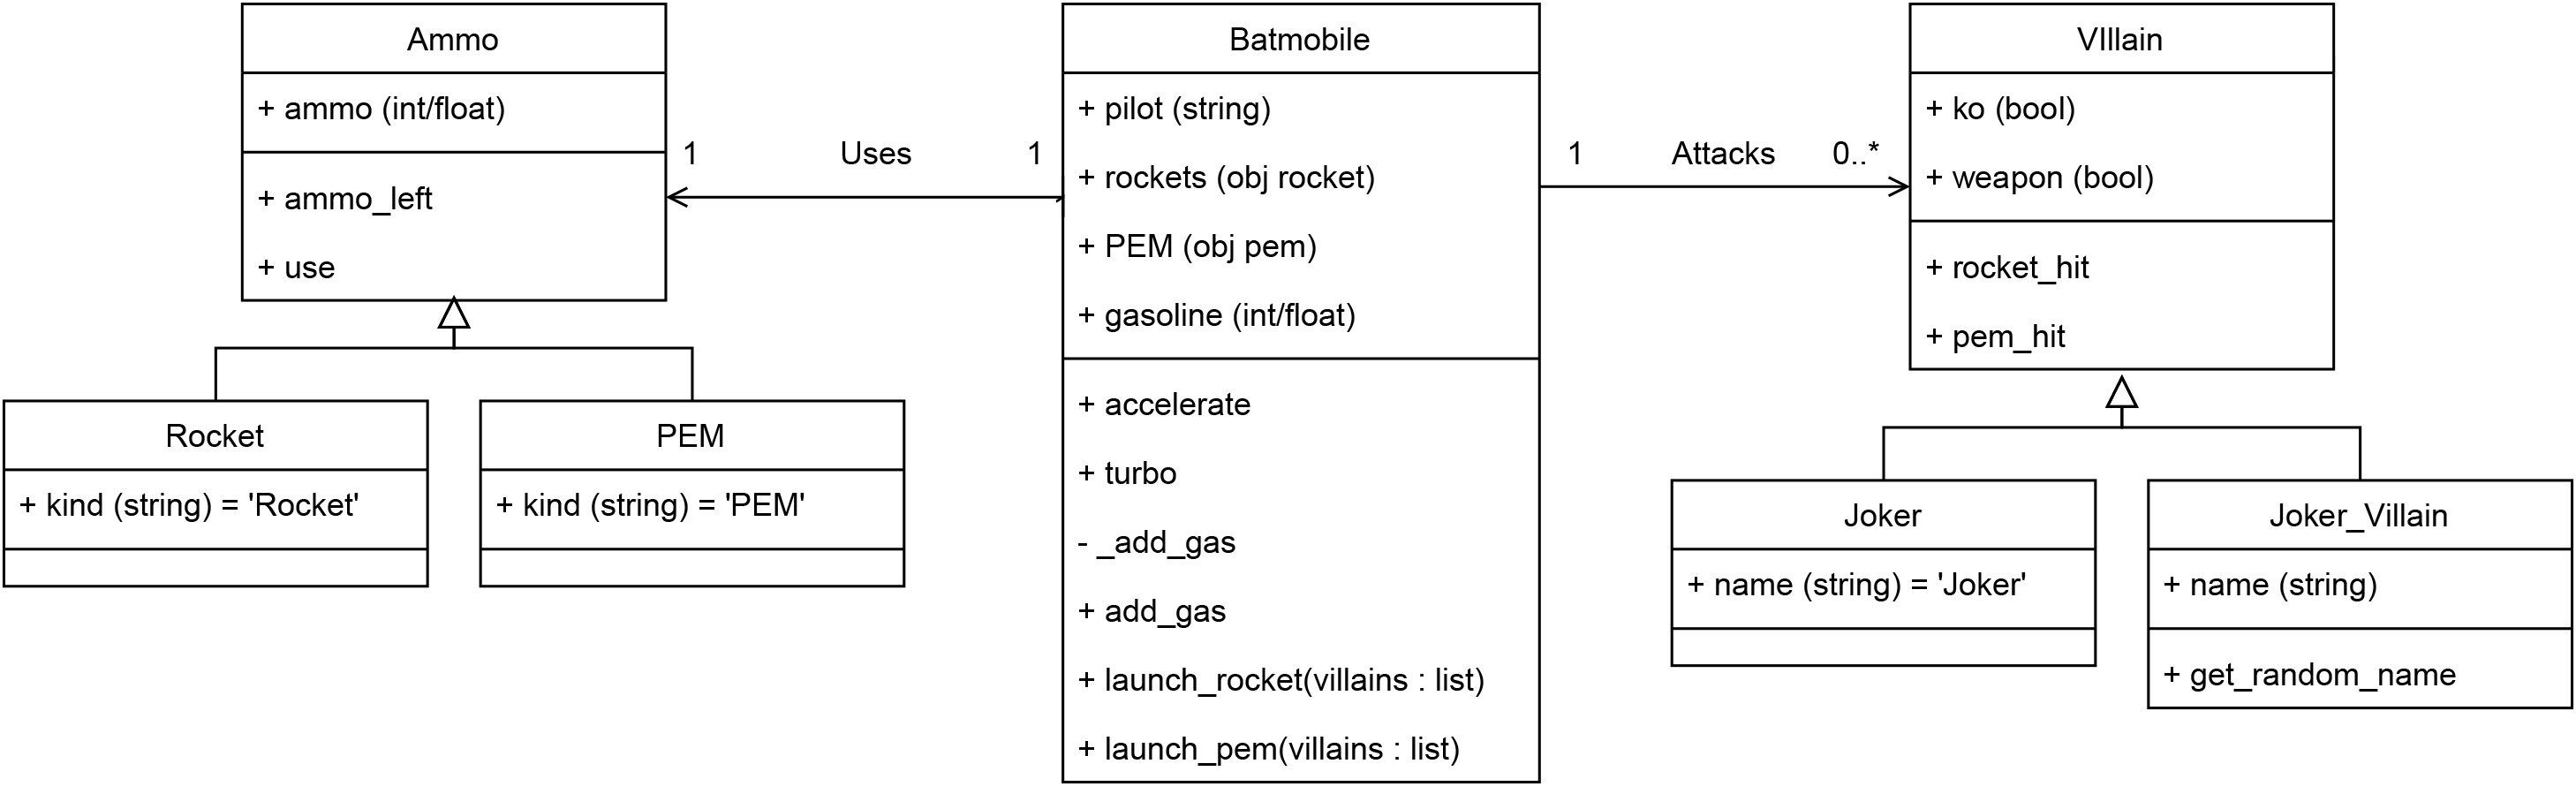

In [5]:
rockets = Rocket(10)
pem = PEM(5)

In [6]:
joker = Joker()
list_villains = [Joker_Villain(name) for name in ["Lucas", "Juan", "Jorge"]]
list_villains.append(Joker_Villain())

In [7]:
batmobile = Batmobile("Batman", rockets, pem, 100)

In [8]:
batmobile.launchRocket([Joker_Villain("Lucas"), Joker_Villain("Juan")])

Rocket used!
There are 9 Rockets left.
Missed!


In [9]:
batmobile.launchPem(list_villains)

PEM used!
There are 4 PEMs left.
Missed!


In [10]:
batmobile.accelerate()

Accelerating!
99L of de gas remaining.


In [11]:
batmobile.turbo()

Using boost!
89L of gas remaining.


In [12]:
batmobile.add_gas(93)

93L have been added to the tank.
Now there are 182L available.
